# Telco Customer Churn Analysis

**Business Problem**  
Customer churn is costly in the telecom industry. Retaining existing customers is more profitable than acquiring new ones.  

**Goal**  
Use the Telco Customer Churn dataset to:  
1. Explore churn patterns and identify high-risk customer groups.  
2. Build baseline machine learning models to predict churn.  
3. Translate model insights into actionable business recommendations.  

**Dataset**  
- Source: IBM Telco Customer Churn dataset (Kaggle).  
- ~7,000 customers, 20+ features (demographics, contracts, services, charges).  
- Target variable: `Churn` (Yes/No).


In [ ]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


In [15]:
filepath = '/Users/ankitwalimbe/churn-telco/data/Telco_Customer_Churn.csv'
data = pd.read_csv(filepath)
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [5]:
# Checking for column names,types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
# DATA CLEANING
# Converting 'Total Charges' from objects to numerical values

data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors = 'coerce')

In [18]:
# Basic cleaning
# Strip column names and values of stray spaces
data.columns = data.columns.str.strip()
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].astype(str).str.strip()

# Coerce numeric fields to numbers (when present)
num_like = ["Monthly Charges", "Total Charges", "Churn Score", "CLTV", "Tenure Months"]
for col in [c for c in num_like if c in data.columns]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Quick sanity
data.info()
data.isna().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Total Charges        11
CustomerID            0
Online Security       0
CLTV                  0
Churn Score           0
Churn Value           0
Churn Label           0
Monthly Charges       0
Payment Method        0
Paperless Billing     0
dtype: int64

In [20]:
preview = (
    data.head(3)
      .T
      .assign(dtype=data.dtypes.astype(str))
      .rename(columns=lambda i: f"row{i}")
)
preview.head(20)



,row0,row1,row2,rowdtype
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,object
Count,1,1,1,int64
Country,United States,United States,United States,object
State,California,California,California,object
City,Los Angeles,Los Angeles,Los Angeles,object
Zip Code,90003,90005,90006,int64
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953",object
Latitude,33.964131,34.059281,34.048013,float64
Longitude,-118.272783,-118.30742,-118.293953,float64
Gender,Male,Female,Female,object


In [9]:
# We have 11 and 5174 null values in the columns 'Total Charges' & 'Churn '

data['Total Charges'] = data['Total Charges'].fillna(data['Total Charges'].median())

data['Churn Reason'] = data['Churn Reason'].fillna('Unknown')

In [19]:
# Rechecking for null values
print(data.isnull().sum())

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
Churn Reason          0
dtype: int64


In [11]:
# Convert categorical columns to category type
categorical_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Churn Label']

for col in categorical_cols:
    data[col] = data[col].astype('category')

In [12]:
# Checking for duplicate rows

print(f"Duplicates: {data.duplicated().sum()}")

data = data.drop_duplicates()

Duplicates: 0


In [13]:
# Ensuring the customerID have unique values and do not have null values

print(data['CustomerID'].is_unique) # Returning True or False
print(data['CustomerID'].isnull().sum())

print(data['Payment Method'].unique())

True
0
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
data['Tenure Years'] = data['Tenure Months'] / 12

In [15]:
# Rechecking the data
data.info()
data.isnull().sum()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   object  
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   object  
 3   State              7043 non-null   object  
 4   City               7043 non-null   object  
 5   Zip Code           7043 non-null   int64   
 6   Lat Long           7043 non-null   object  
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure Months      7043 non-null   int64   
 14  Phone Service      7043 non-null   object  
 15  Multiple Lines     7043 non-null   object  
 16  Intern

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Tenure Years
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,0.166667
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0.166667
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,0.666667
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,2.333333
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,4.083333


In [21]:
# CHURN ANALYSIS

# Customer segmentation summary by churn (numeric means + counts)
drop_cols = [c for c in ["CustomerID","Count","Lat Long","Latitude","Longitude","Zip Code"] if c in data.columns]
seg = data.drop(columns=drop_cols, errors="ignore")

num_cols = seg.select_dtypes(include=["number"]).columns.tolist()
summary = (
    seg.groupby("Churn Label", observed=False)[num_cols]
       .mean()
       .round(2)
       .assign(Customer_Count=seg["Churn Label"].value_counts())
)
summary

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Customer_Count
Churn Label,,,,,,,
No,37.57,61.27,2555.34,0.0,50.10,4490.92,5174
Yes,17.98,74.44,1531.80,1.0,82.51,4149.41,1869


### What stands out from the summary
- **Tenure**: Churned customers show **much shorter tenure** on average.
- **Monthly Charges**: Churners tend to pay **more per month**.
- **Total Charges**: Lower cumulative revenue for churners (they leave earlier).
- **Churn Score**: Tracks the label as expected; useful diagnostic, not causal.
- **CLTV**: Lower for churners (again, duration effect).



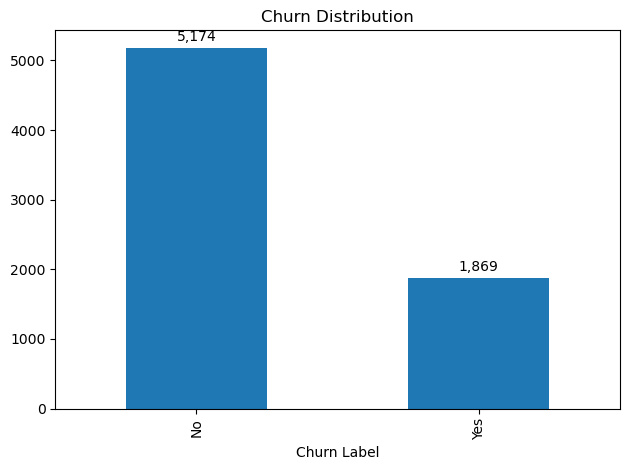

In [33]:
ax = data["Churn Label"].value_counts().sort_index().plot(kind="bar", title="Churn Distribution")
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,3), textcoords="offset points")
plt.tight_layout()
plt.savefig("../reports/figures/churn_distribution.png", dpi=150)
plt.show()


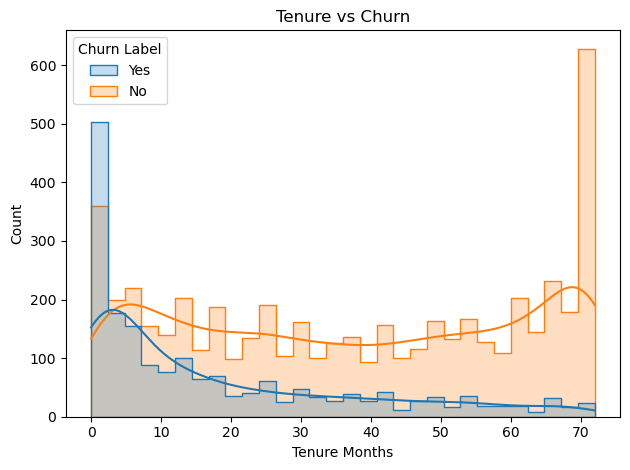

In [34]:
# Tenure vs Churn
sns.histplot(data=data, x="Tenure Months", hue="Churn Label", bins=30, kde=True, element="step")
plt.title("Tenure vs Churn")
plt.tight_layout()
plt.savefig("../reports/figures/tenure_vs_churn.png", dpi=150)
plt.show()


As we can see the cutomers with lower tenures are more likely to Churn

<function matplotlib.pyplot.show(close=None, block=None)>

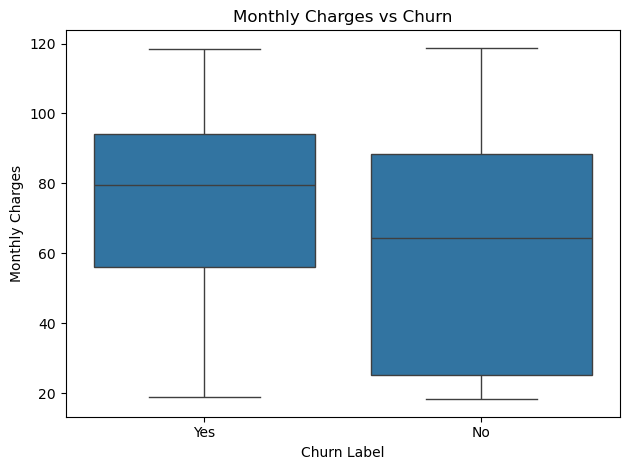

In [35]:
# Monthly Charges vs Churn

sns.boxplot(data = data, x = 'Churn Label', y = 'Monthly Charges')
plt.title('Monthly Charges vs Churn')
plt.tight_layout()
plt.show

Here we can see cutomers who have higher monthly chragers show higher churn rate

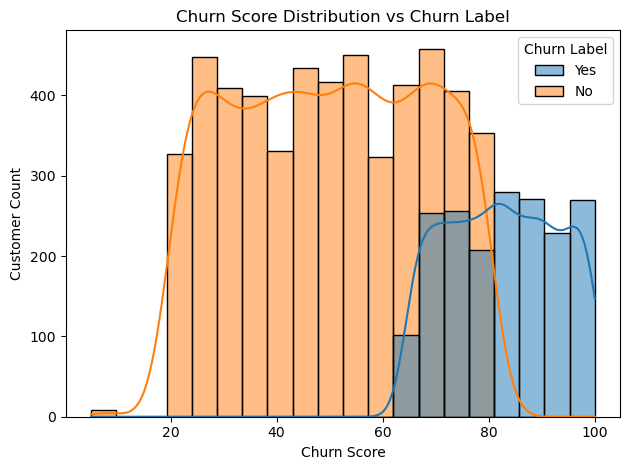

In [36]:
# Churn Score


sns.histplot(data = data , x = 'Churn Score', hue = 'Churn Label', kde = True, bins = 20)
plt.title('Churn Score Distribution vs Churn Label')
plt.xlabel('Churn Score')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()
warnings.filterwarnings('ignore')

In [37]:
# How many customers have Phone Service among those with *no* Internet Service?
mask_no_internet = data["Internet Service"].eq("No")
count_no_internet = mask_no_internet.sum()
count_phone_yes = data.loc[mask_no_internet, "Phone Service"].eq("Yes").sum()

print(f"Customers with NO Internet Service: {count_no_internet:,}")
print(f"…of those, with Phone Service = Yes: {count_phone_yes:,}")


Customers with NO Internet Service: 1,526
…of those, with Phone Service = Yes: 1,526


The overlap suggests many “No Internet” customers still keep **Phone Service**, which can be positioned as a retention anchor (bundle offers, upsell to basic internet).


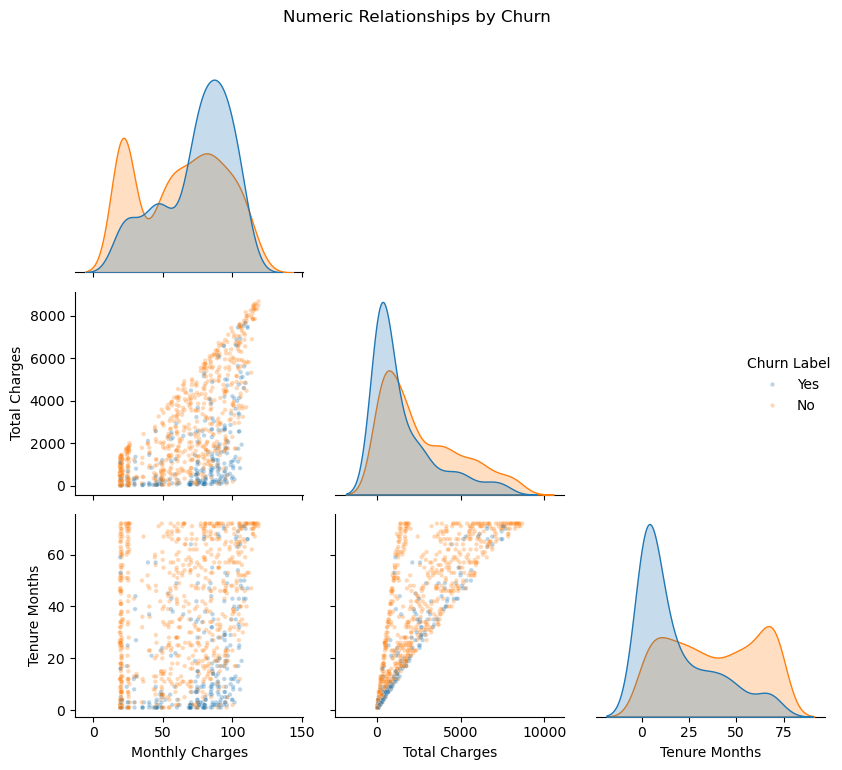

In [48]:
# Visualising key features
# Lightweight pairplot on key numerics (subsample to avoid overplotting)
num_cols = ["Monthly Charges", "Total Charges", "Tenure Months"]
sample = data.sample(1000, random_state=42) if len(data) > 1000 else data

g = sns.pairplot(
    sample, vars=num_cols, hue="Churn Label",
    corner=True,
    plot_kws=dict(alpha=0.3, s=10),
    diag_kws=dict(common_norm=False)
)
g.figure.suptitle("Numeric Relationships by Churn", y=1.02)
plt.tight_layout()
plt.savefig("../reports/figures/pairplot_numeric.png", dpi=150)
plt.show()


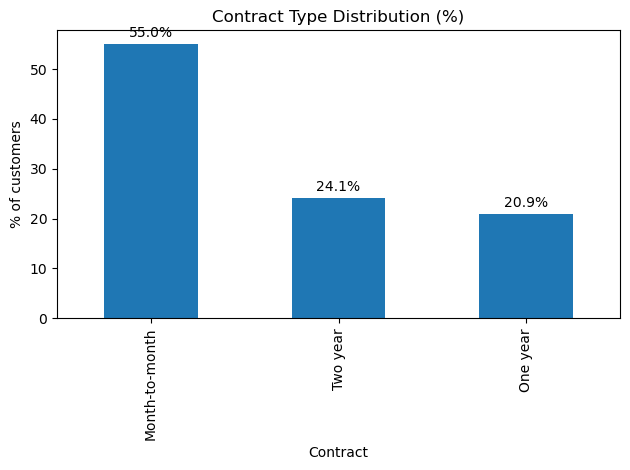

In [ ]:
# Contract type vs Churn
# Contract distribution (%)
ax = (
    data["Contract"].value_counts(normalize=True)
      .mul(100).rename("Percent").sort_values(ascending=False)
      .plot(kind="bar", title="Contract Type Distribution (%)")
)
ax.set_ylabel("% of customers")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,3), textcoords="offset points")
plt.tight_layout()
plt.savefig("../reports/figures/contract_distribution.png", dpi=150)
plt.show()


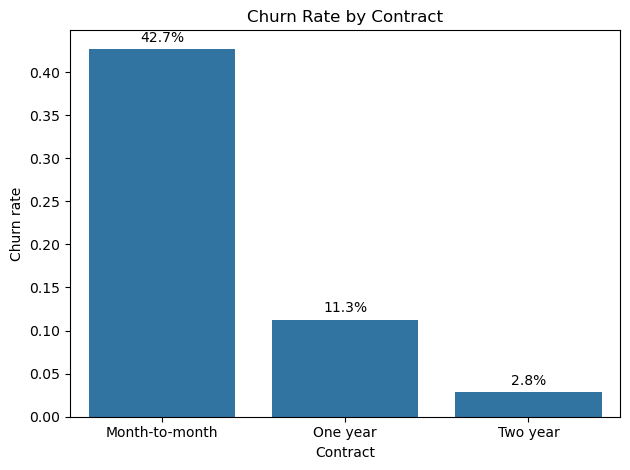

,Contract,churn_rate
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


In [50]:
# Churn rate by contract 

tmp = (
    data.groupby("Contract")["Churn Label"]
      .apply(lambda s: (s == "Yes").mean())
      .reset_index(name="churn_rate")
)
ax = sns.barplot(data=tmp, x="Contract", y="churn_rate")
ax.set_title("Churn Rate by Contract")
ax.set_ylabel("Churn rate")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,3), textcoords="offset points")
plt.tight_layout()
plt.savefig("../reports/figures/churn_by_contract.png", dpi=150)
plt.show()

tmp.sort_values("churn_rate", ascending=False)


**Churn drivers from categorical segments**
- **Internet Service:** Fiber optic users exhibit a noticeably higher churn rate than DSL. This suggests perceived value or service experience gaps.
- **Payment Method:** Electronic check users churn more than auto-pay users, hinting at **payment friction** as a risk factor.

**Actions**
- Target **month-to-month** customers with retention offers (discounted 12-month plan, bundle incentives).
- Investigate **fiber optic** NPS/tickets; fix top pain points.
- Promote **auto-pay** enrollment for high-risk segments to reduce missed payments and friction.
 

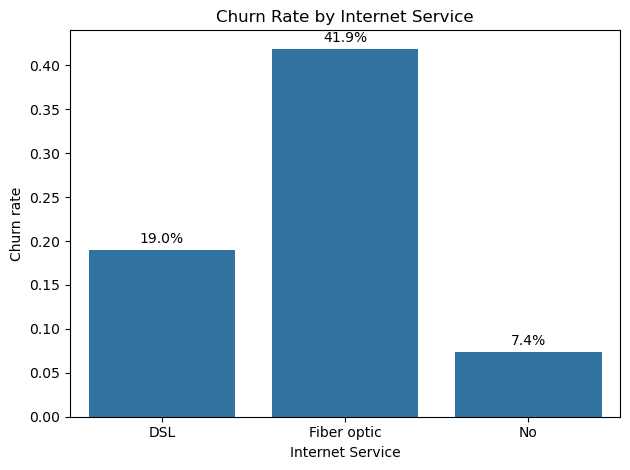

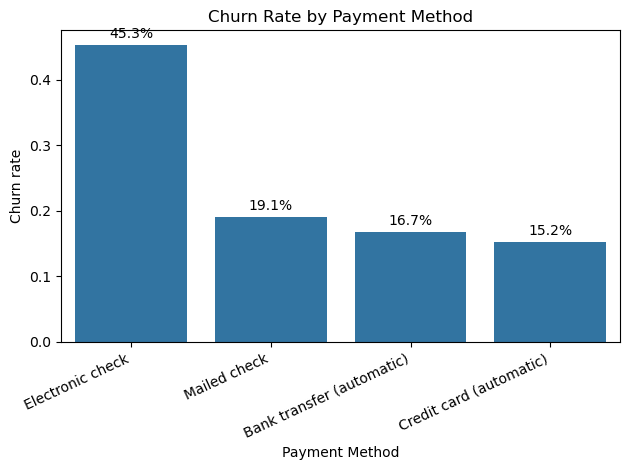

In [52]:
# Further we analyse the catagorical data
tmp = (
    data.groupby("Internet Service")["Churn Label"]
      .apply(lambda s: (s == "Yes").mean())
      .reset_index(name="churn_rate")
)
ax = sns.barplot(data=tmp, x="Internet Service", y="churn_rate")
ax.set_title("Churn Rate by Internet Service")
ax.set_ylabel("Churn rate")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,3), textcoords="offset points")
plt.tight_layout()
plt.savefig("../reports/figures/churn_by_internet.png", dpi=150)
plt.show()

tmp = (
    data.groupby("Payment Method")["Churn Label"]
      .apply(lambda s: (s == "Yes").mean())
      .reset_index(name="churn_rate")
      .sort_values("churn_rate", ascending=False)
)
ax = sns.barplot(data=tmp, x="Payment Method", y="churn_rate")
ax.set_title("Churn Rate by Payment Method")
ax.set_ylabel("Churn rate")
plt.xticks(rotation=25, ha="right")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,3), textcoords="offset points")
plt.tight_layout()
plt.savefig("../reports/figures/churn_by_payment.png", dpi=150)
plt.show()


Seeing as there are a significant values under the category 'No' for all three payment metohds, lets see if there exist a correlation between customers who have no internet service but have phone service

Furthermore the highest Churn rate is seen for Electronic Payment, additionally we see that that payment method is highly used for 'Fiber Optics', indicating that it has the highest Churn amoungst the various Internet services. 

In [54]:
mask_no_internet = data["Internet Service"].eq("No")
total_no_internet = mask_no_internet.sum()
phone_yes = data.loc[mask_no_internet, "Phone Service"].eq("Yes").sum()
share_phone_yes = phone_yes / total_no_internet if total_no_internet else 0

print(f"Customers with NO Internet Service: {total_no_internet:,}")
print(f"...of those, Phone Service = Yes: {phone_yes:,} ({share_phone_yes:.1%})")

Customers with NO Internet Service: 1,526
...of those, Phone Service = Yes: 1,526 (100.0%)


The two values are the same, indicatiing that the two are related, thus calrifying that customers who have internet service have phone service. 

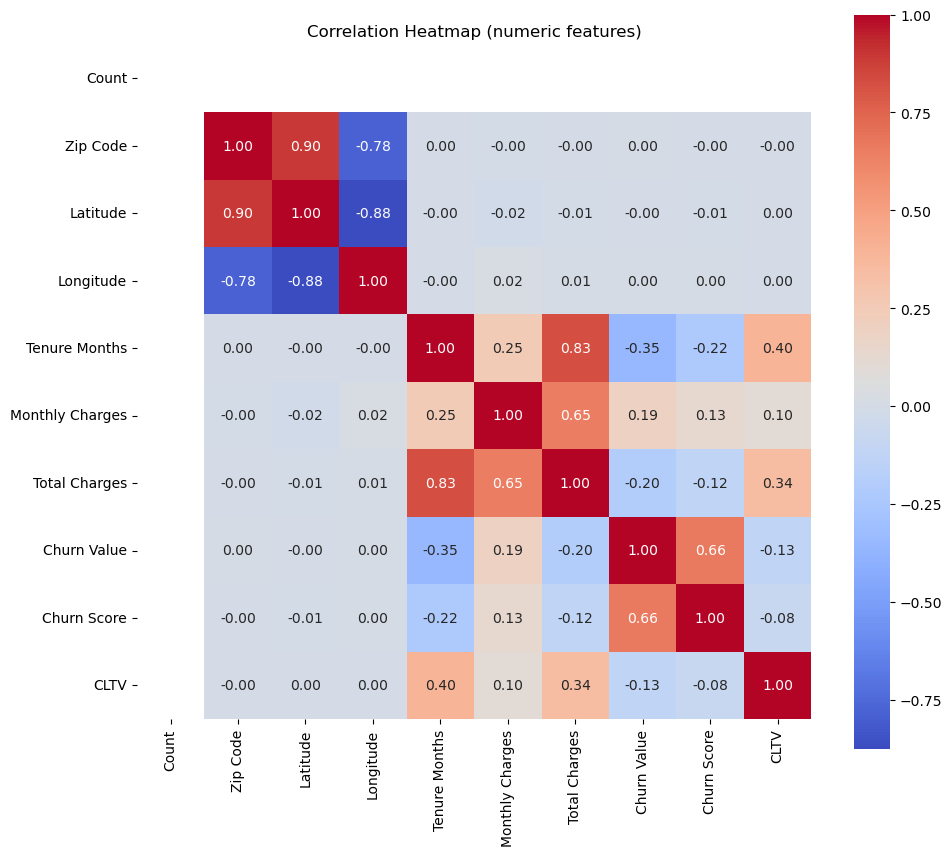

In [ ]:
# Correlation analysis
# Taking only the numerical data from the dataframe
n_df = data.select_dtypes(include=["int64","float64"])
corr = n_df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.savefig("../reports/figures/correlation_heatmap.png", dpi=150)
plt.show()


In [60]:
(data.isna().sum().sort_values(ascending=False).head(12))

Total Charges        11
CustomerID            0
Online Security       0
CLTV                  0
Churn Score           0
Churn Value           0
Churn Label           0
Monthly Charges       0
Payment Method        0
Paperless Billing     0
Contract              0
Streaming Movies      0
dtype: int64

In [61]:
data = data.dropna(subset=["Total Charges"])

In [75]:
# Test-train split for basic model prediction.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Target variable (map Yes/No to 1/0)
y = data["Churn Label"].map({"Yes": 1, "No": 0})

# Drop ID/geo/score columns not useful for modeling
drop_cols = [c for c in ["CustomerID","Count","Lat Long","Latitude","Longitude",
                         "Zip Code","Churn Value","Churn Score"] if c in data.columns]
leakage_cols = [
    "CustomerID", 
    "Churn Value", 
    "Churn Score", 
    "CLTV", 
    "Churn Reason", 
    "Churn Label"  # target
]

X = data.drop(columns=leakage_cols + ["Churn Label"], errors="ignore")

# Split numeric and categorical
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

# Preprocessor: pass numerics as-is, one-hot encode categoricals
pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [76]:
def eval_scores(y_true, y_pred, model_name):
    return {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
    }

results = []

# Logistic Regression
logreg = Pipeline([("pre", pre), ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))])
logreg.fit(X_train, y_train)
results.append(eval_scores(y_test, logreg.predict(X_test), "Logistic Regression"))

# Decision Tree
tree = Pipeline([("pre", pre), ("clf", DecisionTreeClassifier(max_depth=6, class_weight="balanced", random_state=42))])
tree.fit(X_train, y_train)
results.append(eval_scores(y_test, tree.predict(X_test), "Decision Tree"))

# Random Forest
rf = Pipeline([("pre", pre), ("clf", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1))])
rf.fit(X_train, y_train)
results.append(eval_scores(y_test, rf.predict(X_test), "Random Forest"))

model_results = (
    pd.DataFrame(results)
    .set_index("model")
    .round(3)
    .sort_values("recall", ascending=False)
)
model_results


,accuracy,precision,recall,f1
model,,,,
Decision Tree,0.717,0.481,0.816,0.605
Logistic Regression,0.731,0.497,0.783,0.608
Random Forest,0.795,0.636,0.532,0.579


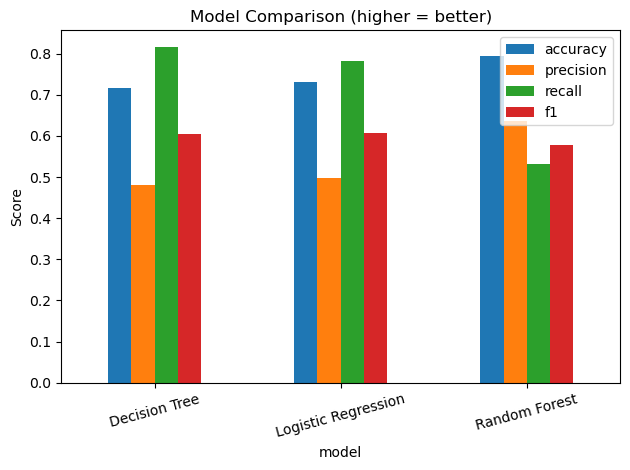

In [77]:
# Visualising the model result.

ax = model_results.plot(kind="bar", rot=15, title="Model Comparison (higher = better)")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("../reports/figures/model_comparison.png", dpi=150)
plt.show()



## Predictive Modeling Results

After removing leakage features (`Churn Score`, `Churn Value`, `CLTV`, `Churn Reason`), I trained three baseline classifiers.

| Model               | Accuracy | Precision | Recall | F1   |
|---------------------|----------|-----------|--------|------|
| Decision Tree       | 0.717    | 0.481     | 0.816  | 0.605 |
| Logistic Regression | 0.731    | 0.497     | 0.783  | 0.608 |
| Random Forest       | 0.795    | 0.636     | 0.532  | 0.579 |

**Takeaways**
- **Decision Tree & Logistic Regression** achieved higher recall (≈0.78–0.82), meaning they are better at catching actual churners. This is useful when the business goal is to *not miss at-risk customers*, even if some false positives occur.
- **Random Forest** achieved higher overall accuracy and precision, but recall dropped to ≈0.53, meaning it misses more churners.
- Trade-off: If the business prioritizes **retention campaigns**, a higher-recall model (e.g., Logistic Regression) is preferred. If the business cares more about **targeting fewer customers with higher confidence**, Random Forest is stronger.

**Next steps**
- Try ensemble methods (Gradient Boosting, XGBoost, LightGBM) for a better balance of recall/precision.
- Tune thresholds: in churn problems, it’s often better to sacrifice precision for recall.
- Incorporate cost analysis: the cost of false negatives (missed churners) is higher than false positives.


## Findings → Actions

- **Month-to-month contracts** drive the highest churn.  
  → Offer easy upgrades to 12-month plans with first-month discounts; add early-tenure retention touches.

- **Fiber optic** customers churn more than **DSL**.  
  → Audit fiber experience (support tickets, outage patterns) and prioritize fixes in high-risk cohorts.

- **Electronic check** users churn more than **auto-pay** users.  
  → Default customers to auto-pay with clear benefits (fee waiver, small credit).

- **Short tenure** + **high monthly charges** is a risky combination.  
  → Target onboarding education and bill-shock mitigation for the first 3–6 months.

**Limitations**: Public dataset; correlations ≠ causation. Validate interventions with A/B tests and cost-based thresholds.
